<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>BESLISSINGSBOOM: VOORBEELD HARTAANVAL</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook laat je Python een beslissingsboom genereren op basis van een tabel met gelabelde voorbeelden.<br>Een beslissingsboom biedt een oplossing voor een classificatieprobleem, hier in een medische context. 
</div>

<div>
    <font color=#690027 markdown="1">
        <h2>1. Het medisch probleem</h2> 
    </font>
</div>

Men kan enkele parameters in rekening brengen om te proberen voorspellen of een patiënt risico loopt op een hartaanval. Van een gekende patiënt zijn bepaalde parameters terug te vinden in het patiëntendossier.<br>
De volgende tabel toont zo’n parameters voor zes (gekende) patiënten met de vermelding of ze al dan niet een hartaanval kregen.

<table>
 <thead>
    <tr>
      <th><p align="center">Patiëntnummer</th>  
      <th><p align="center">Pijn in de borststreek</th>
      <th><p align="center">Man</th>
      <th><p align="center">Rookt</th>
      <th><p align="center">Voldoende lichaamsbeweging</th> 
      <th><p align="center">Hartaanval</th> 
  </thead>
   <tr> <td> <p align="left">1           
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ja   
        <td> <p align="center">&nbsp;&nbsp;ja 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;nee   
        <td> <p align="left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ja  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
   <tr> <td> <p align="left">2            
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ja   
        <td> <p align="center">&nbsp;&nbsp;ja 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;ja  
        <td> <p align="left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; nee  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
   <tr> <td> <p align="left">3           
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; nee   
        <td> <p align="center">&nbsp;&nbsp;nee 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;ja  
        <td> <p align="left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; nee 
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
   <tr> <td> <p align="left">4  
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; nee   
        <td> <p align="center">&nbsp;&nbsp;ja
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;nee  
        <td> <p align="left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ja   
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee
   <tr> <td> <p align="left">5 &nbsp;&nbsp; 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ja                                   
        <td> <p align="center">&nbsp;&nbsp;nee 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;ja   
        <td> <p align="left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ja 
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
   <tr> <td> <p align="left">6          
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; nee             
        <td> <p align="center">&nbsp;&nbsp;ja 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;ja          
        <td> <p align="left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ja 
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee     
</table>

In deze tabel wordt een patiënt aangeduid met een ‘patiëntnummer’.<br> 
De parameters ‘pijn in de borststreek’, ‘man’, ‘rookt’ en ‘voldoende lichaamsbeweging’ zijn de parameters die in aanmerking genomen worden om het risico op een hartaanval te bekijken.<br> De patiënt kan behoren tot de categorieën ‘hartaanval’ of ‘geen hartaanval’, dus tot de klasse ‘ja’ (wat hetzelfde is als ‘hartaanval’) of de klasse ‘nee’ (wat hetzelfde is als ‘geen hartaanval’).

<div>
    <font color=#690027 markdown="1">
        <h2>2. De beslissingsboom</h2> 
    </font>
</div>

### Modules importeren

Je importeert eerst de nodige Python-modules om de nodige functies en methodes te kunnen gebruiken.

In [1]:
import numpy as np                         # om tabel te kunnen ingeven als een matrix
import matplotlib.pyplot as plt            # om afbeelding van beslissingsboom te kunnen tonen 
from sklearn import tree                   # om beslissingsboom te genereren

<div>
    <font color=#690027 markdown="1">
        <h3>2.1 Voorverwerken van de dataset</h3> 
    </font>
</div>

<div class="alert alert-box alert-info">
Merk op dat waarden van de parameters (variabelen) hier categorisch zijn, dus je zet ze om naar numerieke waarden, zodat de computer ermee kan werken: <br>
in plaats van 'ja' gebruik je de waarde '1' en in plaats van 'nee' gebruik je de waarde '0'.  
</div>    

Analyseer eerst de tabel. Wat staat er juist in?
-  In de eerste kolom staat het patiëntnummer, wat geen invloed heeft op het al dan niet krijgen van een hartaanval. Dat patiëntnummer laat je dus buiten beschouwing.
- De gezondheidsparameters 'pijn in borststreek', 'man', 'rookt' en 'voldoende beweging' zijn wel van belang en neem je dus in beschouwing. 
- De laatste kolom geeft de categorie waartoe de patiënt behoort: 'hartaanval' of 'geen hartaanval'. Je gaat dus op zoek naar splitsingen die een minimale spreiding van de patiënten over deze twee klassen teweegbrengen. 

<div class="alert alert-box alert-info">
Een tabel van getallen stelt men in de wiskunde voor door een matrix. <br>
In Python geef je zo'n matrix rij per rij in. Je gebruikt daarvoor de functie array() van de module NumPy, die je eerder al importeerde. 
</div>    

In [2]:
# elke rij in matrix komt overeen met één patiënt
# waarden van gezondheidsparameters staan in resp. kolom 1, 2, 3, 4 van matrix data
# laatste kolom geeft of patiënt risico loopt op hartaanval ('1') of niet ('0').
data = np.array(
      [[1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0]])

Nu geef je aan de computer mee dat in de eerste vier kolommen van de ingegeven matrix de parameters van een patiënt staan en in de laatste kolom de klasse.

In [3]:
# gezondheidsparameters en klasse onderscheiden
gezondheidsparameters = data[:, :4]        # eerste 4 kolommen van matrix zijn beschouwde parameters
klasse = data[:, 4]                        # laatste kolom zijn klasse waartoe patiënt behoort

Aan de hand van de volgende twee codecellen controleer je even of je alles juist ingaf.

In [4]:
print(gezondheidsparameters)

[[1 1 0 1]
 [1 1 1 0]
 [0 0 1 0]
 [0 1 0 1]
 [1 0 1 1]
 [0 1 1 1]]


In [5]:
print(klasse)

[1 1 1 0 1 0]


<div class="alert alert-box alert-warning">
Je kan oefenen met matrices in de notebook 'Matrices'. <br>
</div>    

<div class="alert alert-box alert-info">
De variabelen in deze notebook kunnen slechts twee waarden aannemen: 'ja' of 'nee'. Men spreekt dan ook van Booleaanse variabelen. Deze variabelen kunnen ook de waarde '0' of '1' aannemen of 'True' en 'False'.   
</div>

<div>
    <font color=#690027 markdown="1">
        <h3>2.2 Genereren van de beslissingsboom</h3> 
    </font>
</div>

In Python is alles een object. Je maakt dus eerst een object aan: een beslissingsboom die patiënten zal classificeren. Je doet dat met de functie DecisionTreeClassifier() van de module tree. Merk op dat je erbij zegt dat de computer daarbij de gini-index moet gebruiken. <br>
Je verwijst naar dat object met de variabele beslissingsboom.<br>
Je geeft aan de computer de instructie om een beslissingsboom te maken die past bij gegevens over de parameters en de klassen.

In [6]:
# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(gezondheidsparameters, klasse)                # boom genereren die overeenkomt met data

DecisionTreeClassifier()

Goed, de computer deed wat je hem vroeg. Maar je kan het resultaat nog niet te zien. <br> Er moet nog een laatste stap worden ondernomen.

<div>
    <font color=#690027 markdown="1">
        <h3>2.3 Tonen van de beslissingsboom</h3> 
    </font>
</div>

Om een afbeelding van de beslissingsboom te tonen op het scherm maak je eerst een tekenvenster aan, je vertelt aan de computer wat er in dat scherm moet verschijnen en geeft tot slot de instructie om de afbeelding te laten zien.  <br>
Je gebruikt de functies figure() en show() van matplotlib, en de functie plot_tree() van de module tree.

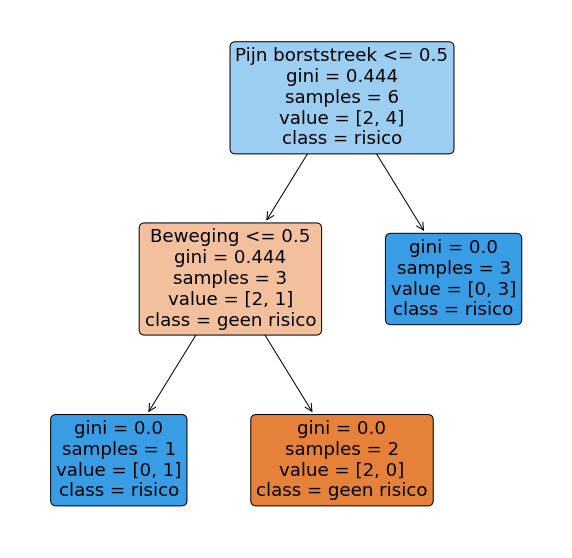

In [7]:
# beslissingsboom tonen 
plt.figure(figsize=(10,10))                                                     # tekenvenster aanmaken
tree.plot_tree(beslissingsboom,                                                 # aangeven wat er moet getoond worden
               class_names=["geen risico", "risico"],                               
               feature_names=["Pijn borststreek", "Man", "Rookt", "Beweging"],  # gezondheidsparameters: 'pijn in borststreek', 'man', 'rookt', 'voldoende beweging'
               filled=True, rounded=True)
plt.show()                                                                      # figuur tonen

<div>
    <font color=#690027 markdown="1">
        <h2>3. Alle code samen</h2> 
    </font>
</div>

In [ ]:
# nodige modules importeren
import numpy as np                         # om tabel te kunnen ingeven als een matrix
import matplotlib.pyplot as plt            # om afbeelding van beslissingsboom te kunnen tonen 
from sklearn import tree                   # om beslissingsboom te generen

# data
data = np.array(
      [[1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0]])

# parameters en klasse onderscheiden
gezondheidsparameters = data[:, :4]        # eerste 4 kolommen van matrix zijn beschouwde parameters
klasse = data[:, 4]                        # laatste kolom zijn klasse 

# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(gezondheidsparameters, klasse)                # boom genereren die overeenkomt met data

# beslissingsboom tonen 
plt.figure(figsize=(10,10))                                                     # tekenvenster aanmaken
tree.plot_tree(beslissingsboom,                                                 # aangeven wat er moet getoond worden
               class_names=["geen risico", "risico"],                               
               feature_names=["Pijn borststreek", "Man", "Rookt", "Beweging"],  # gezondheidsparameters: 'pijn in borststreek', 'man', 'rookt', 'voldoende beweging'
               filled=True, rounded=True)
plt.show()                                                                      # figuur tonen

### Opdracht

Wat in deze code zal in de oefeningen hetzelfde blijven? Wat zal je moeten aanpassen?

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Zorg, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 